# EDA

In [7]:
import pandas as pd
import numpy as np

In [8]:
basketball = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/basketball_stat.csv")
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [9]:
# 필요없는 열 삭제
basketball.drop("Player", axis = 1, inplace = True)

In [10]:
# 기본 정보 출력
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     100 non-null    object 
 1   3P      100 non-null    float64
 2   2P      100 non-null    float64
 3   TRB     100 non-null    float64
 4   AST     100 non-null    float64
 5   STL     100 non-null    float64
 6   BLK     100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [11]:
# 최대, 최소, 평균, 표준편자, 중앙값 등 출력
basketball.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


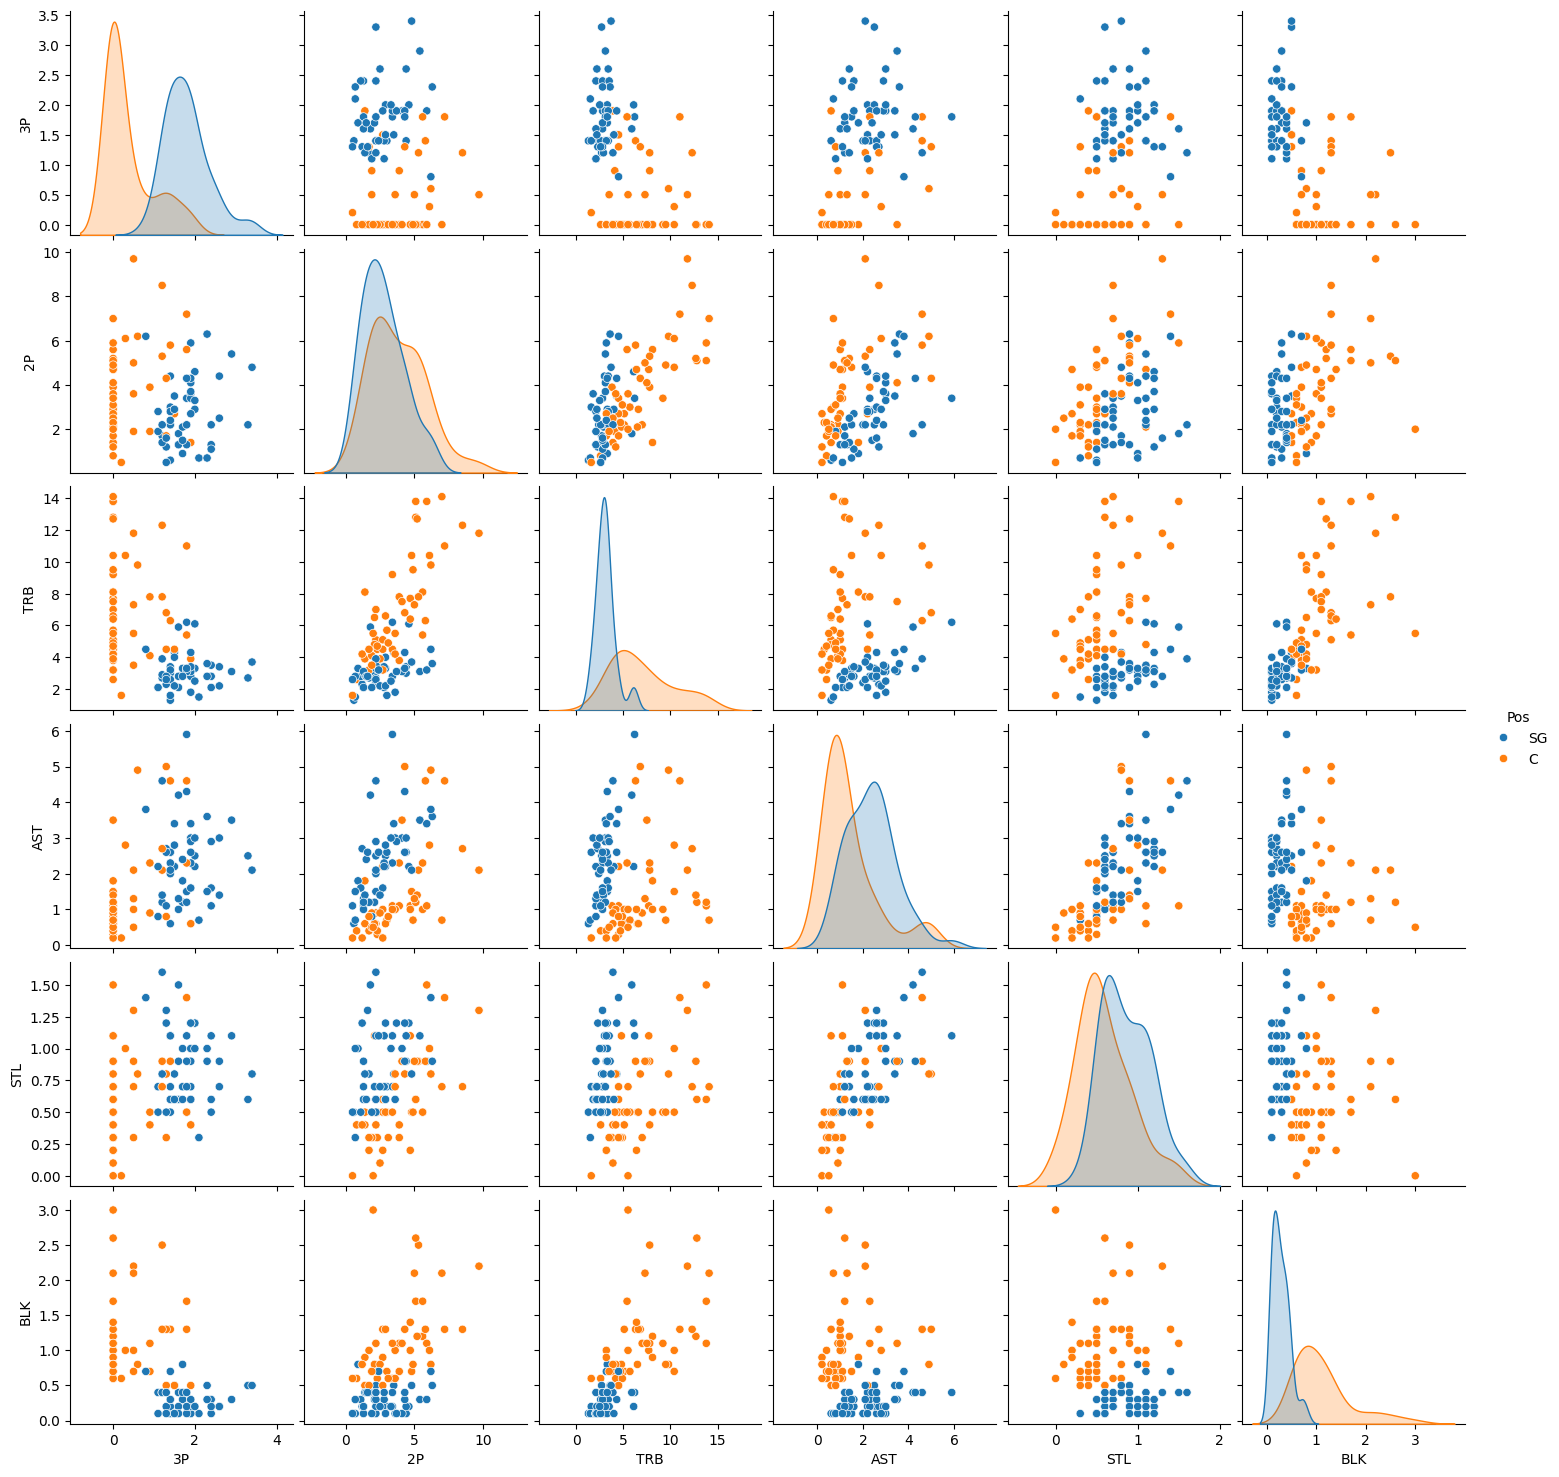

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 pairplot 그리기
sns.pairplot(basketball, hue="Pos")

<Axes: >

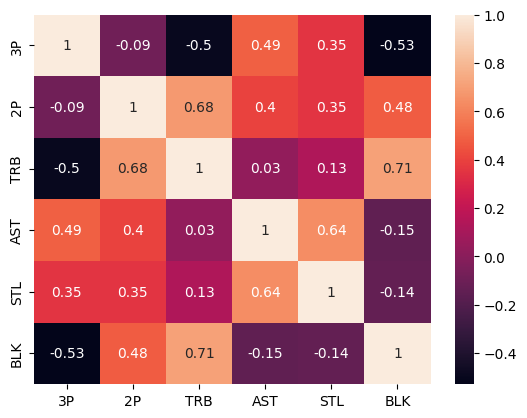

In [16]:
# 상관관계 분석
sns.heatmap(basketball.drop("Pos", axis = 1).corr().round(2), annot=True)

In [17]:
# 독립변수 / 종속변수 구분 - 종속변수는 output
X = basketball.drop("Pos", axis=1)
y = basketball["Pos"]

In [18]:
# 훈련 데이터, 테스트 데이터 나누기 - 각 클래스(타겟)값이 비슷한 비율로 분류되도록 하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [19]:
# 정규화 스케일링
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [20]:
# 표준화 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)